In [1]:
import konlpy

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import re
import tensorflow as tf
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 데이터 확인

In [3]:
import csv
f = open('r1_file.csv','r', encoding = 'UTF-8-sig')
rdr = csv.reader(f)
for line in rdr:
    print(line)
f.close()

['0', '말투 깬다', '1']
['1', '요즘 연앤들 싫은소린 아에 차단하고 듣기좋은소리만 들으려하는듯. 조금만 비판해도 악플러 법적대응이라니 돈써서 본인들이 위라는행동 참 ㅋ 오래가겠다', '1']
['2', '저 짧은 몇 마디에서 인성이 보이넴 ..', '1']
['3', '개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ', '1']
['4', '정신분열 잼 ㅋㅋㅋ', '1']
['5', '실력에비해 오래갔다', '1']
['6', '거만이 하늘을 찌르네. 뭔짓을 하든 묻지도 따지지도 말고 찬양만 하고 돈이나 바쳐라 이건가?', '1']
['7', '점점... 왜저러냐 리더라는게 맨날 표정관리 못하고 기분에 따라 행동하고말하는거 진짜 별로다', '1']
['8', '말하는거 저급해...', '1']
['9', '말투가 왜저래ㅋㅋ', '1']
['10', '아무리 그래도 그렇지 말투가 저게 뭐냐;', '1']
['11', '왜저래 비꼰데?? 힘들면 그냥 조용히 탈퇴하세요~ 요즘 보면 얼굴도 어둡고 기분대로 행동하고 표정 다 드러내더만 이제 내리막길 ..다들 얼굴에 생기가 없고 초심도 잃은거 같고 ..배부르지?? 그만하고 쉬어라 다들 ..팬 많지? 금방 썰물처럼 다 휩쓸려간다 ~너희 아무것도 아니다~ 배부른 소리하고 자빠졌네 ~비호감이네 진짜', '1']
['12', '아무리봐도 잘못 뽑은 것 같다', '1']
['13', '인기있을때 높은곳에 있을 때 말을 좀 조심할 필요가 있을 거 같네요 표현이 참;;;', '1']
['14', '인기도 좋고 다 좋은데 말투가 왜 그래요 어린 팬들도 많은 사람이', '1']
['15', '진짜 예민하네;', '1']
['16', '와...좀 깨긴 깬다 스트레스여서 그럴 수도 있는데 그래도 라이브 동영상에서 저런 말을 했다는게....당신이 그 자리에 앉아있는 것도 그런 관심 때문인 것을....ㅉㅉ', '1']
['17', '윽..진짜 말투 이런다고???', '1']
['18', '말 더럽게 싸

['453', '보고싶지않은 쓰레기 기사 올리는 쓰레기들..', '1']
['454', '대가리를 총에 맞은거 아닐까??그러지 않고서야 저딴 짓을 할리가 없다', '1']
['455', '듣보잡', '1']
['456', '별 미친 이런걸 기사라고', '1']
['457', '옘병들 하넼ㅋㅋㅋㅋㄱㅋㅋ', '1']
['458', '쓰레기', '1']
['459', '사이코들', '1']
['460', '관...종 ㅡㅡ', '1']
['461', '말세다. 이런게 기사거리가되나? 징그럽다', '1']
['462', '막장으로 가는구나', '1']
['463', '캭 퇫 더러워 추한것들', '1']
['464', '극혐...', '1']
['465', '그냥 관심종자같음.  진짜 별의별걸로 관심끄네. 적당히하셈.', '1']
['466', '끼리끼리ㅋㅋㅋㅋ', '1']
['467', '마약에 레즈라 천하에 고아년들', '1']
['468', '관종들 ㅗㅗ', '1']
['469', '아 드러 ㅌㅌ', '1']
['470', '치료가 필요한 것 같다. 관리해주는 사람이 없나? 부모라도 관리를 좀 해줘야지.', '1']
['471', '여자망신 다 시키고 다녀서 싫음', '1']
['472', '차라리 야들 죽이자', '1']
['473', '진짜 지랄하고 나잡빠졌다 ', '1']
['474', '죽어라 그냥 죽어 이 세상에 도움도 안되는 것 같은데 죽지 않고 뭐하는거야', '1']
['475', '주접 떨고 자빠졌다', '1']
['476', '관종', '1']
['477', '근데 이런애들은 뭐해서 먹고 사는거??', '1']
['478', '관종', '1']
['479', '관종', '1']
['480', '난 그냥 니들이 싫어 꺼져줄래', '1']
['481', '끼리끼리', '1']
['482', '쓰레기들. 유전자도 비슷하군', '1']
['483', '세상에는 참 별별 또라이들이 많은것같아....(꼴페미들은 기본사항)', '1']
['484', 'ㅋㅋㅋㅋ 

['475', '이쯤되면 무섭다', '1']
['476', '병원을 가야될거 같은데.', '1']
['477', '아주머니.. 아직도 정신과 예약 안하셨음??내가 대신 해드리고 싶네ㅜㅜ...', '1']
['478', '얘  눈빛이나..이런게..전에는 특별하고 신비하게 보였는데..이제는...정신이 많이 아픈것...같네요....ㅠ', '1']
['479', '이제그만좀해라못봐주겠다조울증같다', '1']
['480', '헐  진짜    헐이다   ㅠㅠ', '1']
['481', '얘 뭔가 이상해~~~~', '1']
['482', '이쁘다고 생각해서 올리나봐요....본인이', '1']
['483', '뭐야 신박한 관종이야', '1']
['484', '우리는 지금 미쳐가는 년을 보고있네요계속 지껄여대는 또라이을보면서  거기에 기사를 계속올려주는 저기자도 제정신이 아닌듯 합니다', '1']
['485', '정상은 아닌듯~~~', '1']
['486', '기자 노트북도 좀 뺐자', '1']
['487', '진짜 이상한 사람같아', '1']
['488', '약 꼭 먹구', '1']
['489', '나르시즘의 끝판왕', '1']
['490', '병인듯.. 병원가야할거 같은데', '1']
['491', '정신과치료 꼭 받으세요~안타깝습니다', '1']
['492', '질린다 질려 윽', '1']
['493', '진심 무섭노', '1']
['494', '정신과 치료가 시급한듯', '1']
['495', '상담받아요', '1']
['496', '할일없이 핸드폰만 붙잡고 있나보다... 일 좀 시켜라', '1']
['497', '저렇게 정서가 불안하고 자기 감정 컨트롤 안되는 사람 중에 주변에 사람 다 떠나서 자기 성질 받아줄 사람 없으니까 반려동물 학대하는 테크 많이 타더라', '1']
['498', '병원부터 가 좀..', '1']
['499', '지긋지극하다~~ 그만좀 해라~~~ 질린다....', '1']
['500', '전문의에게 상담받으삼 진짜 딱함', '1']
['501'

['19', '저 관종새기가 동성애를 하던 말던 관심을 주지마', '1']
['20', 'ㅋㅋ 참 재밌게 산다.부모 잘만나서 백수 관종으로 하고 싶은거 다 하고 살고.. 아 일하기 싫다.저렇게 돈걱정 없이 막살아 보고 싶다ㅋ', '1']
['21', '곧 있으면 비즈니스 동반자살시도 까지 하겠군. ㅋㅋㅋㅋㅋ', '1']
['22', '종나 웃긴게 유아인 게이라는 확신도없는데또 게이라 쳐도 존나 저격하더만ㅋㅋㅋㅋㅋ 지는 동성연애중ㅋㅋㅋㅋㅋ 엮겹다 이중성 ㄹㅇ 관심은 관심대로 다끌다가', '1']
['23', '걍정신병자', '1']
['24', '그냥 정신나간 녀ㄴ들', '1']
['25', '그냥 약이나해라', '1']
['26', '얘는 원래 살짝 맛이 간건지 약 때문에 맛이 간건지 모르겠다. 암튼 결론은 진짜 관종 중의 관종.', '1']
['27', '꼴깝한다아주', '1']
['28', '개징그러움', '1']
['29', '레알 씹관종...... 기사 올라올때마다 인스타질 ㅎㅎㅎㅎㅎㅎ', '1']
['30', '이런 개똥 같은 내용 알고싶지 않아요 기사 올리지 마여 내 정신까지 이상해지네??', '1']
['31', '지랄도풍년이여~ㅋㅋ', '1']
['32', '그냥 정신이상같아요..', '1']
['33', '아니ㅜㅜㅜ  여자끼리 사귀는게 문제는 아닌데 그럼 그냥 인정하던가 어떻게든 더 이슈화 되고 싶어서 부인했다가 인정하고ㅋㅋㅋㅋ 너무 관종같아서 별로임', '1']
['34', '정말 진지하게 전부터 느꼈어요. 병원 치료 받아 보세요.', '1']
['35', '정신병 있는듯..?', '1']
['36', '에혀~한서희 부모님은 뭐하시나?? 자식이 저렇게 살아도 그냥 나두나??부모님이 불쌍타', '1']
['37', '정체성이 어쩌고 동성이 어쩌고 난 일종의 정신병으로 본다. 어릴 적 집안환경으로 인해 사람에 따라 폭력적으로 변하거나 뭐 이런 것들 ..... 진심 역겹고 토나온다 ..... 인정해달라는 정신병자들  무섭', '1']
['38', 

In [4]:
dic = pd.read_csv('r1_file.csv',encoding = 'UTF-8-sig')
dic[:5]

,0,말투 깬다,1
0,1,요즘 연앤들 싫은소린 아에 차단하고 듣기좋은소리만 들으려하는듯. 조금만 비판해도 악...,1
1,2,저 짧은 몇 마디에서 인성이 보이넴 ..,1
2,3,개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ,1
3,4,정신분열 잼 ㅋㅋㅋ,1
4,5,실력에비해 오래갔다,1


In [5]:
dic.columns = ['0', 'comment', 'label']
dic[:5]

,0,comment,label
0,1,요즘 연앤들 싫은소린 아에 차단하고 듣기좋은소리만 들으려하는듯. 조금만 비판해도 악...,1
1,2,저 짧은 몇 마디에서 인성이 보이넴 ..,1
2,3,개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ,1
3,4,정신분열 잼 ㅋㅋㅋ,1
4,5,실력에비해 오래갔다,1


In [6]:
comment_data = dic[['comment','label']]
comment_data[:5]

,comment,label
0,요즘 연앤들 싫은소린 아에 차단하고 듣기좋은소리만 들으려하는듯. 조금만 비판해도 악...,1
1,저 짧은 몇 마디에서 인성이 보이넴 ..,1
2,개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ,1
3,정신분열 잼 ㅋㅋㅋ,1
4,실력에비해 오래갔다,1


In [7]:
print(len(comment_data)) # 댓글 개수 출력

9316


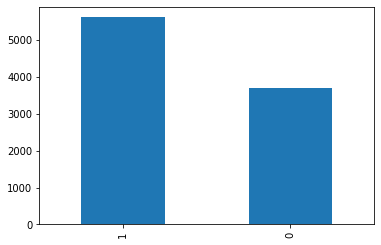

In [8]:
comment_data['label'].value_counts().plot(kind='bar') #data 분포 그래프를 통해서 확인하기

In [9]:
X_data = comment_data['comment']
y_data = comment_data['label']
print('comment 개수: {}'.format(len(X_data)))
print('rating개수: {}'.format(len(y_data)))

comment 개수: 9316
rating개수: 9316


# 불용어 제거 및 토큰화

In [10]:
normalized_text = []
for string in X_data.tolist():
    try:
        tokens = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣]+", " ", string.lower())
    except Exception as e:
        print(string)
        break
    normalized_text.append(tokens)
print(normalized_text[:5])

['요즘 연앤들 싫은소린 아에 차단하고 듣기좋은소리만 들으려하는듯 조금만 비판해도 악플러 법적대응이라니 돈써서 본인들이 위라는행동 참 ㅋ 오래가겠다', '저 짧은 몇 마디에서 인성이 보이넴 ', '개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ', '정신분열 잼 ㅋㅋㅋ', '실력에비해 오래갔다']


In [11]:
comment_data.comment = normalized_text
for sentence in comment_data['comment']:
    print(sentence)

요즘 연앤들 싫은소린 아에 차단하고 듣기좋은소리만 들으려하는듯 조금만 비판해도 악플러 법적대응이라니 돈써서 본인들이 위라는행동 참 ㅋ 오래가겠다
저 짧은 몇 마디에서 인성이 보이넴 
개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ
정신분열 잼 ㅋㅋㅋ
실력에비해 오래갔다
거만이 하늘을 찌르네 뭔짓을 하든 묻지도 따지지도 말고 찬양만 하고 돈이나 바쳐라 이건가 
점점 왜저러냐 리더라는게 맨날 표정관리 못하고 기분에 따라 행동하고말하는거 진짜 별로다
말하는거 저급해 
말투가 왜저래ㅋㅋ
아무리 그래도 그렇지 말투가 저게 뭐냐 
왜저래 비꼰데 힘들면 그냥 조용히 탈퇴하세요 요즘 보면 얼굴도 어둡고 기분대로 행동하고 표정 다 드러내더만 이제 내리막길 다들 얼굴에 생기가 없고 초심도 잃은거 같고 배부르지 그만하고 쉬어라 다들 팬 많지 금방 썰물처럼 다 휩쓸려간다 너희 아무것도 아니다 배부른 소리하고 자빠졌네 비호감이네 진짜
아무리봐도 잘못 뽑은 것 같다
인기있을때 높은곳에 있을 때 말을 좀 조심할 필요가 있을 거 같네요 표현이 참 
인기도 좋고 다 좋은데 말투가 왜 그래요 어린 팬들도 많은 사람이
진짜 예민하네 
와 좀 깨긴 깬다 스트레스여서 그럴 수도 있는데 그래도 라이브 동영상에서 저런 말을 했다는게 당신이 그 자리에 앉아있는 것도 그런 관심 때문인 것을 ㅉㅉ
윽 진짜 말투 이런다고 
말 더럽게 싸가지 없게 하네ㅋㅋㅋㅋㅋ 니 성격대로 피코짓 하지말고 이제 힘든척 울지마 이 가식덩어리야
멘탈이 상당히 불안정한듯 제발 말과 글을 자제하고 행동을 조심해주길 
맨날 표정관리못하고 기분에따라 행동하고그리고 그만 우세요 
말은 조심히 써야 된다고 본다 그런 말투라면 모든행동이 가식적으로 느껴질거 같다 
어차피 이래저래 이미지 다 망가졌는데 열심히 쉴드 쳐라ㅋㅋㅋㅋㅋㅋ
인성 보소 
요즘 얘네 무슨 특권의식이 이렇게 심한지 모르겠음 회사 인성관리 한다고 하지 않았나 
깨진 건 너 얼굴이다
개돌았네
아 싼티나
언행이 참 가벼워보이네 ㅋㅋ 그렇게 안봤는데 벌레보

목걸이랑 얼굴 극혐
진짜 밑바닥 인생이다 ㅉㅉ
헐 저 얼굴로 딱 봐도 학창시절 디지게 맞았을상이네 갑자기 떠오르지않는데 먼 동물이 저렇게 똑닮았는데 전형적으로 못생긴 관종 씨래기같은 넘 
세상엔 ㅂㅅ도 너무 많음
생긴것도 씹다버린 껌처럼 아무렇게나 생겨가지고 찐따주제에 활개치고 다니네 나가 뒤져라 이 찐따야 ㅠ
하 진짜 너무 실타 개밥그릇같은게 진짜 그냥 시러 너무시러가지고 너무짜증나네
그 성별 한남충이네
길가에 너무 돌아다니지는 말아라 니는 악플이 아니라 사람들이 ㄹㅇ로 면전에다가 욕할수도있음ㅇㅇ조심해
쌍판 진짜 쳐때려 패주고싶게 생겼다 
어지간하면 생김새로뭐라안하는데 저놈은 바퀴벌레 쓰레빠로 때렸을때 느낌생각나네
엄마는 많이 챙피하겠다 미역국 먹은게 ㅉㅉ 
어디서 꼴뚜기왕자같은게 
좆같고 찐따같이 생겼네 진짜 못생겼다
이제부터 저놈 죽으라고 계속 악플 달아줘야지 
개쭈꾸미 같이 생겼네 ㅋㅋㅋㅋ관종새기
생긴대로 논다는 말이 이럴때 쓰는거구만 
정신병원에 입원해라정신병자는 자기가 정신병자인줄 모르는법
남사친도 하기싫은 얼굴인데 악풀 많이 받으실듯 격어보셔 쌩 양아야 
저러사람 너무 무서움 정상적인 사람이 아닌건 분명함 
얼굴 뭐같이 생겼구만
개똥보다 못생긴놈 새끼가 지랄떠네
와 진짜 생긴대로 노는구나 ㅋㅋㅋㅋ
어찌 니 얼굴로 어이없는 수준도 안되는 정신과 빨리 가보시길 
얼굴값ㅆㅅㅌㅊ
깨진 타조알같이 생겼네
아 생긴거보소 극혐이다 정말 너도 악플좀 받겠다
저 불량 감자는 뭥미 니주제을 알아라 불량감자야
무식하구나 양심도 없고 사고도 못하고 사는 장애를 가졌으니 참 불쌍타 
한남충
생긴대로 논다는 말 하나도 안틀렸다 참 생긴대로 가지가지 한다 새키
한심하다 진짜
관상만 보면 진짜 여자뿐 아니라 남자들도 싫어할 얼굴아니냐 저런얼굴도 있구나
약간 촛농 같이 생긴듯
와 난 처음에 노숙자가 아파트 재활용에 가서 옷 겨우겨우 챙겨 입고 세수도 못하고 나온줄 알았음 나이는 몇살인데 이마 주름 보고 또한번 놀람 
나댈때 나대라 분위기 파악 못하지 공감도 지능에서 나오는거야 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


니들엄마는뭐한다니 
ㅈㄹ도 풍년일세
변태 
두명 다 이상한 정신병
온갖 더러운짓 더러운일 인성이 쓰레기다 그거지 
더러운년
가정교육의 중요함을새삼느끼네
콩가루 집안인가 골때리
한남된 고추없는 한녀 고자 ㅋㅋㅋㅋㅋ
잊혀지나싶을때또나오네 ㅋㅋㅋㅋㅋㅋ
정신병자들 일상생활을 우리가 왜 알아야하나 
한녀가 한녀했네
이런애들도 사는데 자살하지 맙시다 
놀고들있네 아침에 똥산것도 올려라
듣보잡들 풍기문란죄로 소환안되나여 진짜 ㅈ선한영향이아닌 아주 나쁜영향이나끼치고 기분 짜증나게만드네
비정상인
정신과 치료 꼭 받아라
에휴 관심병자 또 나와서 난리네
이런 기사는 미세먼지같은 지저분한 공해다 
이런뇨ㄴ들은 고조 북한으로 보내야함
쟨 이 세상 모든 사람들이 죽이고 싶은 사람 위 아닌가 
하아 이 바이러스 같은 것들은 뭐냐 엄마도 제정신은 아닌듯 하긴 
오늘도 끼리끼리 놉니다 
난 얘좀 ㅁㅊ것같애 그냥 흠 
말세다 주여 
그러던지 말던지 제발 좀 꺼져라
이런기사 보고싶지 않아요 메인에서 좀 치워주세요 관종인생
얘는 죽어가는순간에도 인스타할 듯
그냥 이런기사는 안 썼으면 언론에 보도되는것 조차 부끄럽네
정상은 아닌듯
제발 부모님을 좀 생각해라 으이그 
너무 못 배워 먹은 거 같어 
이런 지저분한 기사는 쫌 걸르자
당신들 진짜 안보고 싶따 
정말 이런 거지같은 기사좀 올리지마시죠아이들 다 망치고있네 정신이상 애들 어이없는짓거리를 왜 보편적인양 올리고앉았나요 어이가없네
조용히좀 살어 나중에 나이먹으면 그땐 너두 네자식도 창피할거다
개 짖는 소리 안나게해라
얘들아 그만 좀 해라 하다 하다 이제 정상적으로 좀 살자
관종들 기사 안올렸으면
관종 
기사내려라 
관심받고싶은가요 
관종 
이게 세상말세라는겁니다 이걸 기사라고 써주는게 
노이즈마케팅을 본인스스로 하는듯 
쓰레기네
잡것아 아가리 닥치고 살아 
니 면상 보면 토쏠려 우웩
드러븐것들 소식을 일일이 올리는 미친세상 
진짜 꼴값떤다 고만나대라
처먹고살만하니까 별짖을다하네
정신병에 걸린 환자일 뿐이다
버 러지 같은 관종년들
ㅠ얘 정상아닌것같아

어쩜 미성년자때부터 한결같을 수가 있는 지 멋진 사람
완벽한 사람 그 자체
훈훈하네요
시의적절한기사네요
예전부터 미담이 너무 너무 많죠 
그냥 기본적으로 다른 사람을 존중하고 배려하는 모습이 내재되어 있는 따뜻한 사람이에요 
늘 응원합니다 
승승장구하구 행복하길 바래요
마음이천사야ㅠㅠㅠㅠ
월드트렌드 정말 인기와파급력 넘버원 최고다최고
인성은 기자들사이서도 유명하지 더흥해라 
배려와 양보가 익숙해서 스텝들에게 감사해 하는 너무 착해
선한 눈을 보면 힐링이 됩니다 언제나 응원할게
너무 대단해요 
안 예뻐 할 수가 없네
존재 자체가 선물이고 사랑이야
배려심은 주번에 있는 모든이들이 다 알듯
사랑할수밖에 없는 천사지
타팬분들 타팬홈마님들도 인성칭찬하시더라 선후배아티스트분들 공경하고 예의바르고 스텝분들을 항상챙기고 따뜻하게 격려하는 모습 항상감동이야
화이팅
나는 네가 자랑스러워 ㅠㅠㅠㅠㅠㅠ
너의 목소리와 웃음은 언제나 나의 행복이야
좋은 부모님 영향을 받아 가슴 따뜻하고 예의바른 사랑가득한 사람 우리는 항상 응원하구 사랑하는거 알지 
마음도 몸도 다치지 않는 한해가 되길 
항상 인성도 행실도 올바르기 때문에 주변 사람들 모두 좋아하는 것 같아요
못하는게 뭐인가요 정말 모든걸 다 잘하시는것같아요
못하는게 없어보여요
예쁘네요
항상 진심 아닌적이 없지 힐링이야 
잘커서 이젠 너무멋지기까지 
최고의위치에있어도 언제나 처음처럼 팬분들 스탭분들 챙기는모습 너무예쁘고 기특해 
미담은 털어도 끝이없는데
사랑하는데 이유 없음 선한 것에 본능처럼 끌리더라
팬이라서 너무행복해요 
미담제조기 그 자체네
항상 행복하게 웃을수 있기를
이분을 보면서 생각이 많이 바뀌었어요 이렇게 성실하고 소탈하고 마음 따뜻한 또 그게 한결같은 사람도 있구나 하구요 자기 길 열심히 가면 좋겠어요 언제까지나 응원합니다 
따뜻한 마음씨
사람 잘 챙기고 인성바른거 아는 사람은 다아는데 
사랑한다
주변에는 칭찬해주고 예뻐해주는 사람들만 있길 바래 무슨일이잇어도 항상 응원할게
항상 응원해
착하고 잘생기구 사랑스러워 열심히

인간 표독 그 자체
더러운년
좀 이상한 애
얘도 자살하려나 
관심종자
얘 휴대폰 좀 뺏어라
주위에 누구없나 인터넷못하게먹아라 
완전 ㄸㄹㅇ네
감정폭력자
그냥 누구 편도 아닌데 정상같지는 않아보임 진심
 일산병원정신과 성안드레아 신경정신병원 용인정신병원 가족사랑 서울 정신과 의원 송신경정신과의원 신경정신과의원 동민신경정신과 솔빛정신과의원 대구정신병원 인천참사랑병원 부산동래병원 일산병원 정신과 성안드레아 신경정신병원 
정신 심리상담이 필요해보이네요
얜 미친사람 같아 정신차려
제대로 싸이코
이제 국민 밉상이 되버림 남은 시간 동안 반성하며 사세요 
제정신인지 위문이 듬
진정 성격파탄자의 실사판을 보는듯 
와 눈빛봐라 소오름
병원 좀 가보세요 정신과요
한국은 땅덩어리도 좁은대 정신장애들은 알차게도 많네
잊혀지기 싫은가보다ㅋㅋㅋ자기세상에 갇혀 사는 느낌이야
분명 얘 가정환경에 문제있다니까
그리고 연예계에서 완전 은퇴하길 바란다 당신 때문에 다른 사람들 개고생과 피해봤네 
추잡 떨고 있네 
정신과 상담좀 받아봐진짜 문제 있는거 같다 그리고 이제 조용히좀 살어
쿵쾅이
같이 안 살아봐도 질린다 
그냥 말 못하는 반려견 반려묘들하고만 살아야할듯 소통의 상대가 없는 듯하다
이쯤되니 자기잘못이 뭔지 인정도 못하는 자기애 과잉과 공감능력도 떨어지는 소시오패스 성향 있어보임 
뇌는 저세상 뇌였다 
옆에사람이 지치고 질려버리게 하는 성격이다 
좋게봤었는데 갈수록 맨탈이 이상한애 같네 
누가 해킹 시도해서 저년 계정 폭파 좀 
하는짓이 노답이고 정신상태가 미숙하니 불쌍해서 주변사람들이 봐주고 배려를 해줘도 정신못차리고 또 나대시내요 
정상은 아니라는것 
보는 눈이 다르지만 한번도 예쁘다고 생각한적없는 촌티나는 얼굴 근데 맘까지 이리 구린줄이야 진짜 미저리같다
병인 거 같다 
조울증 경계선 인격 성격 장애 약물치료 입원치료 필요해보이네요 
저러다가 자살 소동 벌이고 민폐의 끝을 보여줄까봐 겁난다 자존감은 낮은데 자존심만 높다 그리고 변덕이 죽 끓듯이 하고 타인의 고통에는 도 공감하지 못하

천길 낭떠러지로 끝도 없이 추락하는거 같아 자기만 모르는 것 같아
중 병이냐
성숙해지시길 
병이네 병이야
왜케 무섭냐 
다시 입원해라 이상해
진심 정신병자 같음 
싸이코
탈모치료해야할듯
점점 병이 심해지는구나 
이 정도면 좀 무서워진다
진심으로 상담받아봐야 하는거 아니냐
얘 약물검사좀 해봐야할듯
ㄸㄹㅇ 같음 ㅋㅋ
자업자득이다 인격수양부족인지 참을성도없고 염치도 없고 참안타깝네
왜누워서 침뱉는줄 모를까 
하는행동이 섬뜩해 무서워 보고싶지않아
사람이 점점 이상해지네 제발 정신차리길
조울증인거 같아 
마음의 병도 치료받아야해요 부끄러운게 아닙니다 
병원가 
무섭
나이에 맞게 좀 살아라
빨리 병원 좀 데려가세요 더 이상 진행하면 더 심각해질것 같아요 심리상담이라도 우선 받아 보세요
얼굴에 독기봐라ㅋㅋㅋㅋ 무섭다
애는 확실히 심각하네ㅋㅋ
조증 
정신병자
ㅎㄷㄷ
돌추
무관심이 답일듯 
인상 진짜 안좋다
진심 안보고싶다 
제무덤파는구만 쯧
싸이코아닌겨 
관종 이지싶다
뭐가그리잘났는지연예인이대다수이니진짜열받네이제그만좀나오지마라보기가싫다
눈이 맛이갔네
이정도면 거의 무슨수준이라고 하지 않나 안그래 숨막힌다 미세먼지가 많나 ㅋ
진정 병적 관종인건가
ㄲㅈ 진짜
아집착녀
언제 정신차릴래 ㅉㅉ
아휴 진짜 꼴 뵈기 싫어
관종덩어리네 
한숨나온다이제 이상해 정신이
이제좀 정신좀차려 점점 이상해지네
으휴 미친년아
의학적으로 문제 있어보이는데 
돌 
나오지마라 꼴도 보기싫으니께 
정병
진짜 정신적으로 문제 있나봐 
눈이 점점 무서버진다흰자가 넘마너
관종병 걸려서 그럼 이런 관심 또 언제 받아보겠어ㅋ
돌아이
미저리같다 
어쩌다 이렇게됐누 정서적으로 많이 불안해보임
진짜 개때리고싶네
딱히 예뻐보이지도 않는데 ㅋㅋ
눈빛이 
가족들 뭐하냐 정식적으로 심히 불안해 보인데 이젠 될대로 되란 식 
아무래도 신경정신과 진료를 해봐야할듯 
정신상태 검사좀 해봐라
그만 좀 나이가 한둘임 
애정결핍 과한자기애 허세 그리고 자존감이 낮다
예전고급스런이미지가 완전추락한것같네 ㅜㅜ
정신감정필요합니다
진심 이상해보인

차기작 시급 
내가생각하는 제일 예쁜연예인ㅜㅜ 
진짜예뽀 
지금은 또 지금 나이대만의 우아하고 청초한 그런느낌으로 예쁘다 ㅠㅠ
엄청 예쁘더만 ㅋㅋ
인형 미모
진짜 예쁘다 최고다
진짜 겁나 너무 매우 대박 예쁘다ㅠㅠㅠㅠ
이목구비 겁나 화려한데 서로서로 매치 쩔잖아ㅠㅠㅠㅠㅠㅠㅠ
젤 이쁨 부러워 
눈빛이 예술이네 뭐라고 말하는데 뭐지
예쁘다
이쁨은 여전히 
더이뻐진듯 
여자가봐도 넘이쁘네
진짜 너무 예쁘다
더예뻐졌네
젤 이쁜거같음
진짜 이쁘다 역대 최고인듯
너무 예쁘니 주위에서 가만 안두겠다
너무예뻐요 왜케질투쟁이들이 많은지 ㅎㅎㅎ 
같은여자가봐도 저는 너무이쁘고 좋아요
예쁘다 
여신이당
진짜 핫하네 미모도 인기도 
좋은 작품으로 얼른 와 주세요 그미모 그연기력 아까워요
예쁘다 
이목구비 넘사벽 
한사람에게서 다양한 얼굴이 보이고 천상배우네
아니 진짜 시간이 지날수록 어떻게 사람이 계속 이쁘냐 ㅜㅜ
화이팅 
저촌스러운 색깔의원피스를 입고도 저렇게예쁨 눈코입 또렷한거봐 
진짜 프랑스인형보다 더이쁨 
미모와 연기는 국보급 넘 아껴요 
어렸을때는 엄청 이뻤는데 지금은 연륜이 더해져 아름다움으로 극화 됐네요 사랑해요 
레전드급 미모
헐 미쳤다 완전예쁨
예쁩니다
여전히 핫하네
역시 이쁘다
너무예쁜거아닙니까 비현실적이심
최고
진짜 이쁘다
와 갈수록더이뻐지네 
진짜 이쁘다
여전히 이쁘네 
다가진 사람 
너무 이쁜거 아니에요
인형이 아닐까요 
이쁘겠어요 진짜 인형이네요 예쁨주의보 떴다요
저 작은 얼굴에 이목구비가 꽉차있네요
인형이 따로 없네 너무 이쁘다 최고
진짜 너무 이쁘다
역시 
너무 이쁨
이쁨쁨
우왕 어쩜 이리도 이쁠까요 부럽구만요
인형이란 단순한 말로 미모와 분위기를 얘길할 수 없다 
진짜 깊은 멜랑콜리한 눈빛과 오똑한 코 서양미인의 섹시한 입술 타고난 하얀 백옥 피부 좌우 완벽한 대칭 눈코입 타의 추종을 불허한다
넘넘이쁜데
넘 이쁘다 ㅠㅠ 부럽다 
자연미인 따라올 자가 없다 
어쩜 이리도 고혹적인 아름다움이 있는지요 정말 이쁨
왜 나이 안먹는건데 ㅜㅜㅜㅜㅜ 미모 진짜 아

그냥 정신과에 보내는게 정답일듯
관종
이런 개또 ㄹ ㅇ 상ㅁ치인녀 ㄴ 설리보다 더 한년이 있네 부모가 없나
이건뭐 관종들이 대중을 쥐락펴락기자 돈받고 기사쓰나 
스물셋넷이던데 지금이라도 정신차려 늦지않았어
하 좀 꺼져 시끄러
아이구야 말기 관종병 환자가 또 병이 도졌나보다 
ㅈ 랄 똥 을싼다ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
개더럽
아이쿠야 부모님 피가 거꾸로 솟겠다 
앤 부모도 포기한 저능아 
 
더럽다 
관종 
아고 추잡에 토나올듯ㅡㅡ 니부모가불쌍혀 관종짓좀그만해라잉 아 얘보니깐 탑생각나네또ㅡㅡ탑하니까 승리생각나고 어 쓰레기들ㅡㅡ
정신병자
정말 유유상종이란 말은 만고불변의 진리다 
징그러
누군지 모르지만 관종이네
관종이네 관종이야 
데뷔못한 무명연습생출신중에서 가장 유명한여자 이 영악한것 
쓰레기 갑오브갑 
정신나간 이네 저 기사보고싶지않음 
정신이상자 이랬다저랬다 관심받고 싶어서 계속 말바꾸냐 정신과나 가봐라
미친막장년들
진짜 지랄을 한다
마약사범
존징글징글하네
이런게 기사화된게 짜증나고 더럽다
미친게이
신종또라인가 
모야 다중이야 
그 정신과연락처 필요해보입니다 ㅋㅋ 역대급 또라이다
더럽다
관종은 뭐가 달라도 다르군 진짜 관종은 이게 관종이다라고 알려주네
듣보들 관종쇼
병이다
지럴한다
슈퍼관종 약쟁이들 ㅋ 어그로 끌려고 지랄발광
아니 ㅅㅂ 기사좀 그만올려 그러니까 약쟁이년들 둘이서 재밌어서 저지랄 하지
와 토나와
둘다 누구임 
꼴값 
우웩
한서희 관종 확실ㅡㅡㅡㅡㅡㅡ
가지가지한다
사랑을못받고자란애들같다
약쟁이라서 정신이 오락가락 하는듯
정신병 심각하다
관종들임
얘 관종인거 모른사람 
뭐야 애네 관종 역겨워
재수없는것들 기삿거린가 그리없나 또 ㄹ ㅏ 이들
또라이인가
아오 징그러운것
약쟁이끼리 만나네 탑도 그렇고
관종 ㅋ ㅋ
진정한 관종이 여기에 있다 관종이란것을 모른다면 한서희의 행각을 보면 될 것이다 관심없이는 살수가 없는 종족이다 ㅋㅋㅋㅋㅋ 이렇게나 세간에 관심을 받고 싶을까 싶다 어찌 보면 불쌍하기도하고 쟤 인생이 참 막장도 막장도 
제발 찌그러져서살아라
ㅋㅋㅋ

예술이네여 엄청난 노력이 느껴져요 박수를 보냅니다 
진심 멋져요 항상 응원합니다
와 
대박 성공한 사람은 역시 다르네요 자기관리끝판왕
와 므찌다
자기관리도 대단하고 너무 멋져보여요 한분야에서 이렇게 오래 탑 위치에 있기가 힘든데 존경스러워요 항상 응원합니다 
진짜 이건 대박
대박
진짜 멋지네요 
대단해 증말 한분야에 오래동안 그것도 탑
와 진짜 와 
진짜 멋있다
진짜 멋있다 
멋있넹 ㅇㅅㅇ 
너무 멋져 예술
멋있다 진심
너무 멋지다
 멋있다 
아름다워요 최고예요 
오우 멋지다 
아름답네요
너무 멋있다
프로중에 프로 멋져요
멋있게 독특하다
대단히 멋지다
멋집니다 
진짜 멋짐 
인정 아름답습니다 
멋있다
와 진짜 멋있네 
대박 아름답다 보는순간 우와
대박 짱멋 
진짜 멋있다 
너무 예쁘고 부럽고 멋있다 
너무 멋져요 ㅠㅠㅠㅠㅠ 최고ㅠㅠ
와 대박 
프로 멋짐 
대박 
진짜 대단하세요 
진짜 멋있다 
프로는 프로네요 멋있다 
당신은 프로다 
우왕 너무 멋있다 ㅜㅜ 부럽다 
멋지다 진짜
멋있어요 계속 흥 하시길 
멋지네
프로는 프로네요 
진짜 멋있다 
대박 멋져요 
내면까지 멋진 사람인 듯 
멋지네요 응원합니다
소름돋았어요 너무 멋있습니다
하고싶은거 다 해
아름답습니다 대단하십니다 
당신은 최고이십니다 
아름답다
진심 멋지다 
최고 십니다 
와
아름답다
 
멋있다
정말 멋있고 부럽네요 
넘 멋있어요
와 진짜 멋있다
헐
멋지다
짱 멋짐 
멋짐 폭팔
완벽 
경의롭다는 표현밖엔 응원합니다 
멋짐
와 멋지다
미쳤다 대박이다
진짜 너무 예뻐요 
멋있어요 
대박멋짐 
대 박 넘 멋쪄요 
울나라 역대급이다ㄷㄷㄷ
정말 멋있다 
님 좀 짱인듯 
자기관리갑임 정말 워너비다 
정말 너무 멋있어요 
진짜 멋있다 말잇못
진짜 넘 멋져요 언제나 화이팅하세요
헐 대박 대박이다 
와우 내가 본 그누구와도 비교불가 최고로 멋짐보고 또 봐도 감탄이 절로 난다
아름답네요
너무 아름다워요 
진짜 멋있다
대단하네
역대급 존멋 
멋진 여자 
멋있어요
대단합니다 프로이고 멋지다 
최고 박수를 보냅니다 정말 멋

In [12]:
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']#불용어 제거하기

In [13]:
from konlpy.tag import Okt  
okt = Okt()

In [14]:
X_token=[]
for sentence in comment_data['comment']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    #temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_token.append(temp_X)

In [15]:
print(X_token[:3])

[['요즘', '연', '앤', '들', '싫다', '소린', '아', '에', '차단', '하고', '듣기', '좋다', '소리', '만', '들다', '하다', '조금', '만', '비판', '하다', '악플러', '법적대응', '이라니', '돈', '써다', '본인', '들', '이', '위', '라는', '행동', '차다', 'ㅋ', '오래', '가다'], ['저', '짧다', '몇', '마디', '에서', '인성', '이', '보이', '넴'], ['개념', '없다', '원래', '도', '비호감', '이다', '하다', '행동', '이나', '말투', '밉다', '상', '그', '자체', 'ㅋㅋㅋㅋㅋ']]


# 정수 인코딩 수행

In [16]:
max_words = 35000
tokenizer = Tokenizer(num_words = max_words) # 상위 35,000개의 단어만 보존
tokenizer.fit_on_texts(X_token) 
X_token = tokenizer.texts_to_sequences(X_token)

In [17]:
print(X_token[:3])

[[290, 809, 1638, 10, 100, 3324, 43, 6, 3325, 74, 1948, 24, 328, 63, 82, 1, 898, 63, 3326, 1, 2447, 2448, 1639, 264, 551, 329, 10, 2, 368, 318, 319, 64, 115, 493, 90], [52, 575, 1640, 1641, 77, 84, 2, 299, 3327], [552, 13, 369, 5, 125, 14, 1, 319, 238, 109, 378, 402, 75, 168, 351]]


In [18]:
word_to_index = tokenizer.word_index

In [19]:
vocab_size = len(word_to_index)+1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 6414


# 전체 데이터 길이 분포 확인

train 리뷰의 최대 길이 : 124
리뷰의 평균 길이 : 7.194182052382997


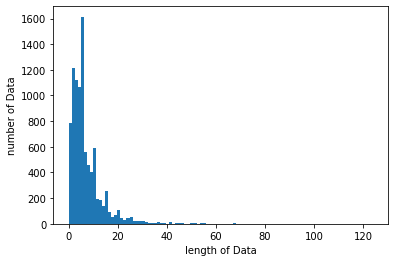

In [20]:
print('train 리뷰의 최대 길이 :',max(len(l) for l in X_token))
print('리뷰의 평균 길이 :',sum(map(len, X_token))/len(X_token))
plt.hist([len(s) for s in X_token], bins=100)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [21]:
max_len = 124
data = pad_sequences(X_token, maxlen=max_len)
print("data shape: ", data.shape)

data shape:  (9316, 124)


In [22]:
X_data = pad_sequences(X_token, maxlen=max_len)
y_data = np.array(y_data).reshape(-1, 1)

In [23]:
print(type(X_data))
print(type(y_data))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [24]:
print(X_data[:3])
print(y_data[:3])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0  290  809 1638   10  100 3324   43    6 3325
    74 1948   24  328   63   82    1  898   63 3326    1 2447 2448 1639
   264  551  329   10    2  368  318  319   64  115  493   90]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
 

# 데이터 분리

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size= 0.3, random_state=1234)

In [26]:
print(X_train[:3])
print(y_train[:3]) 

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0  106  368    6 1419 1234
   282  712  498  440    7  383    1  135    2   64  119   24]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
 

# 모델 만들기

In [27]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

In [28]:
model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = 0.2)

Train on 5216 samples, validate on 1305 samples
Epoch 1/10
5216/5216 [==============================] - 40s 8ms/sample - loss: 0.3819 - acc: 0.8200 - val_loss: 0.1716 - val_acc: 0.9395
Epoch 2/10
5216/5216 [==============================] - 36s 7ms/sample - loss: 0.1136 - acc: 0.9634 - val_loss: 0.1335 - val_acc: 0.9479
Epoch 3/10
5216/5216 [==============================] - 35s 7ms/sample - loss: 0.0528 - acc: 0.9835 - val_loss: 0.1764 - val_acc: 0.9418
Epoch 4/10
5216/5216 [==============================] - 34s 7ms/sample - loss: 0.0297 - acc: 0.9904 - val_loss: 0.1690 - val_acc: 0.9456
Epoch 5/10
5216/5216 [==============================] - 34s 7ms/sample - loss: 0.0219 - acc: 0.9933 - val_loss: 0.1960 - val_acc: 0.9387
Epoch 6/10
5216/5216 [==============================] - 35s 7ms/sample - loss: 0.0160 - acc: 0.9944 - val_loss: 0.2135 - val_acc: 0.9341
Epoch 7/10
5216/5216 [==============================] - 35s 7ms/sample - loss: 0.0179 - acc: 0.9944 - val_loss: 0.2296 - val_acc: 

In [29]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

2795/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


 테스트 정확도: 0.9420


# accuracy-ㄷ

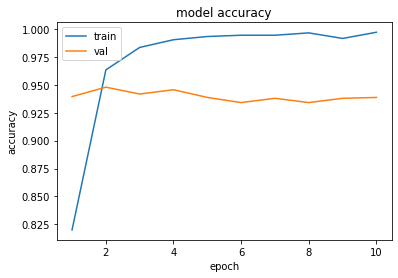

In [30]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()